In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("student.txt")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Check points

#### 1. check missing
#### 2. check duplicates
#### 3. check data types
#### 4. check number of unique values in each column
#### 5. check statistical data
#### 6. check various categories present in categorical columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## EDA
1 categorical and numerical columns

In [10]:
categorical = [feature for feature in df.columns if df[feature].dtypes == "object"]
numerical = [feature for feature in df.columns if df[feature].dtypes != "object"]

print("we have",len(categorical),"categorical features :",categorical)
print("we have", len(numerical),"numerical features :",numerical)

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']


#### number of unique varibales in categorical features

In [11]:
for feature in df[categorical]:
    unique_values = df[feature].unique()
    num_unique= len(df[feature].unique())
    print( feature, num_unique, "unique variables ,","they are", unique_values)

gender 2 unique variables , they are ['female' 'male']
race_ethnicity 5 unique variables , they are ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education 6 unique variables , they are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch 2 unique variables , they are ['standard' 'free/reduced']
test_preparation_course 2 unique variables , they are ['none' 'completed']


#### Adding total score and average score as new features

In [12]:
df["total_score"] = df["math_score"] + df["writing_score"] + df["reading_score"]
df["average"] = (df["total_score"]/3).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [23]:
reading_full = df[df["reading_score"]==100].average.count()
writing_full = df[df.writing_score == 100].average.count()
math_full = df[df.math_score== 100].average.count()
print("the number of students with full marks in reading are :", reading_full)
print("the number of students with full marks in writing are :", writing_full)
print("the number of students with full marks in math are :", math_full)

the number of students with full marks in reading are : 17
the number of students with full marks in writing are : 14
the number of students with full marks in math are : 7


In [27]:
reading_fail = df[df["reading_score"]<=40].average.count()
writing_fail = df[df.writing_score <= 40].average.count()
math_fail = df[df.math_score<= 40].average.count()
print("the number of students with fail marks in reading are :", reading_fail)
print("the number of students with fail marks in writing are :", writing_fail)
print("the number of students with fail marks in math are :", math_fail)

the number of students with fail marks in reading are : 27
the number of students with fail marks in writing are : 35
the number of students with fail marks in math are : 50


#### 1. students have perfomed the least in math
#### 2.its the subject where students have failed the most and lessers number of students have achieved the full marks


## Exploratory (visualizartion)
1. visualizing average score distribution
* Histograms

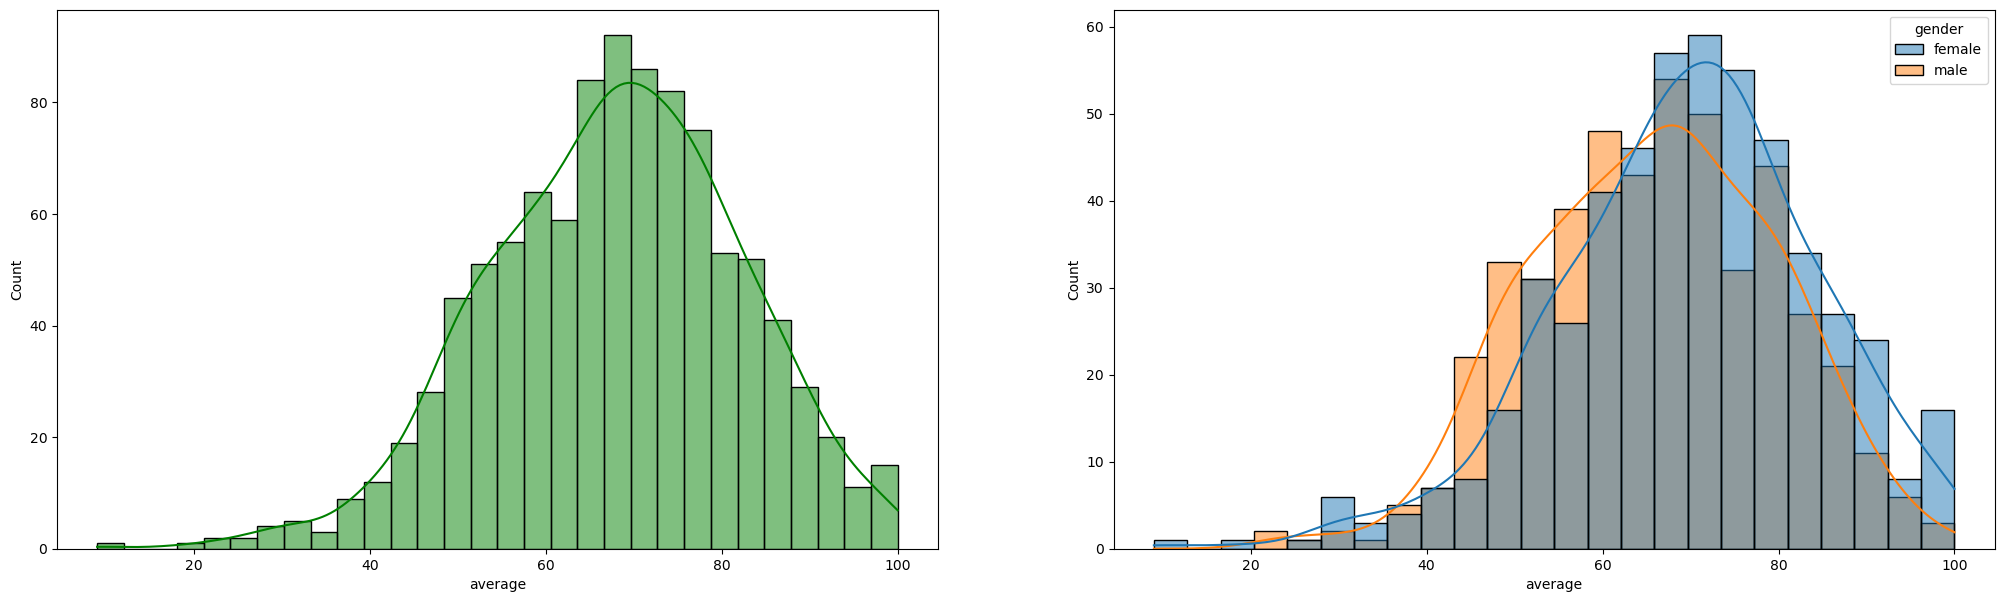

In [41]:
fix,axs = plt.subplots(1,2, figsize=(25,7))
plt.subplot(121)
sns.histplot(data=df, x="average",bins=30, kde = True, color="g")
plt.subplot(122)
sns.histplot(data=df,x="average", kde=True, hue = "gender")
plt.show()

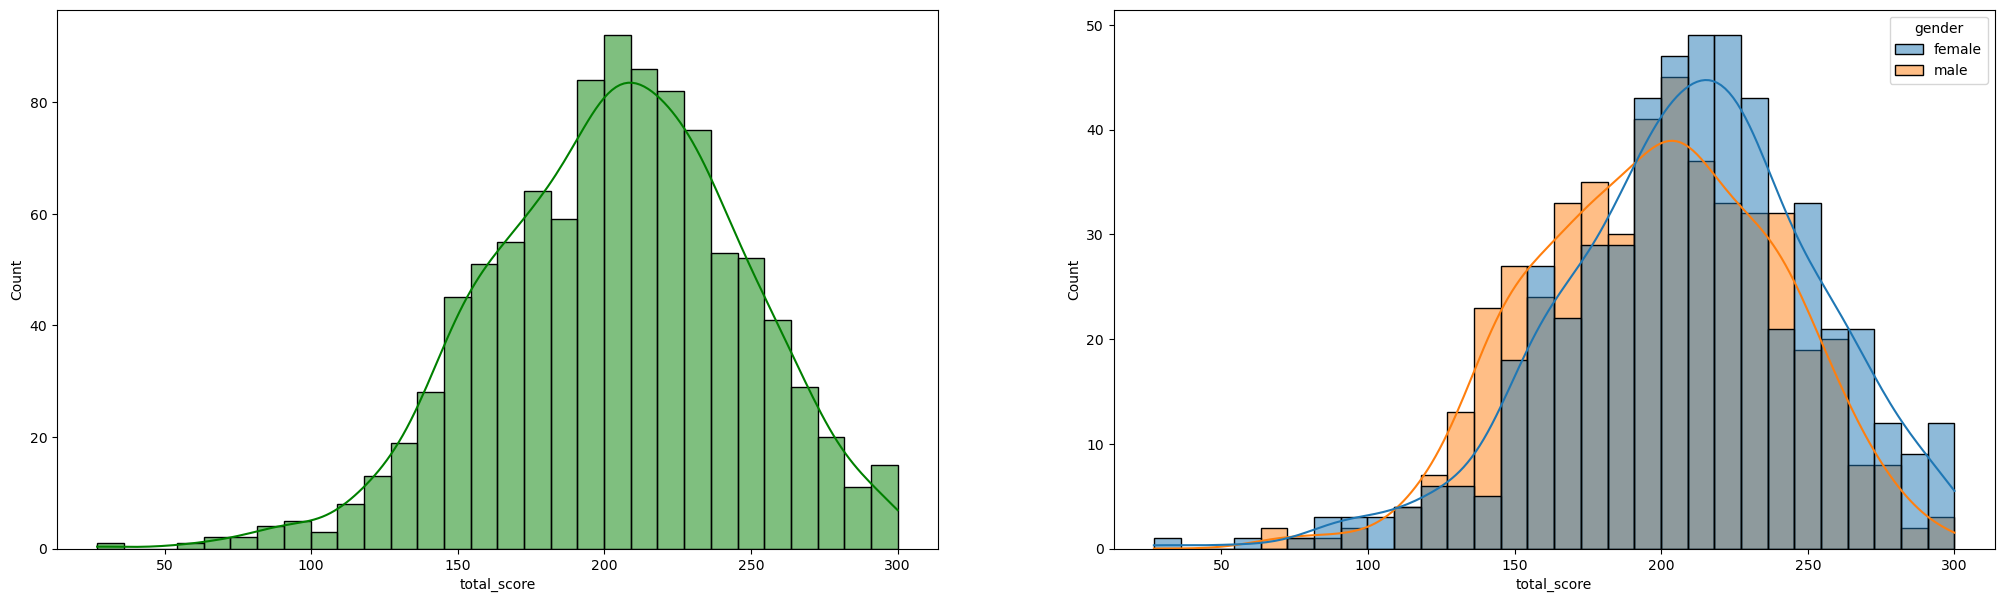

In [43]:
fig,axs = plt.subplots(1,2, figsize=(25,7))
plt.subplot(121)
sns.histplot(data=df,x="total_score", bins = 30, kde= True, color = "g")
plt.subplot(122)
sns.histplot(data=df,x="total_score", bins = 30, kde= True, color = "g",hue = "gender")
plt.show()

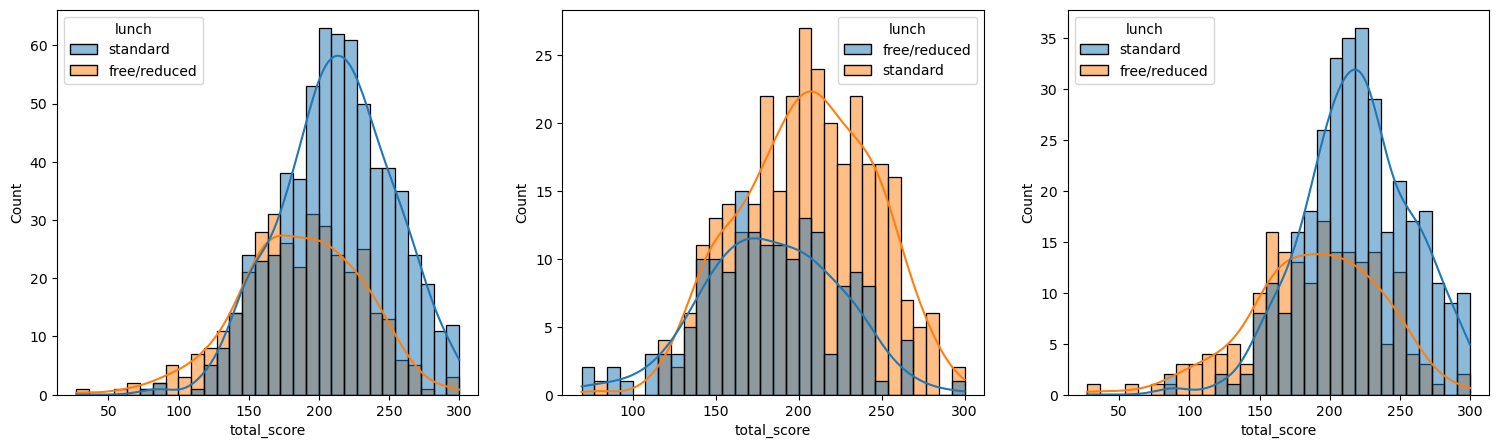

In [53]:
fig,axs = plt.subplots(1,3, figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x="total_score", bins = 30, kde= True, color = "g",hue = "lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="male"],x="total_score", bins = 30, kde= True, color = "g",hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="female"],x="total_score", bins = 30, kde= True, color = "g",hue="lunch")
plt.show()

##  Maximum score of students in all three subjects

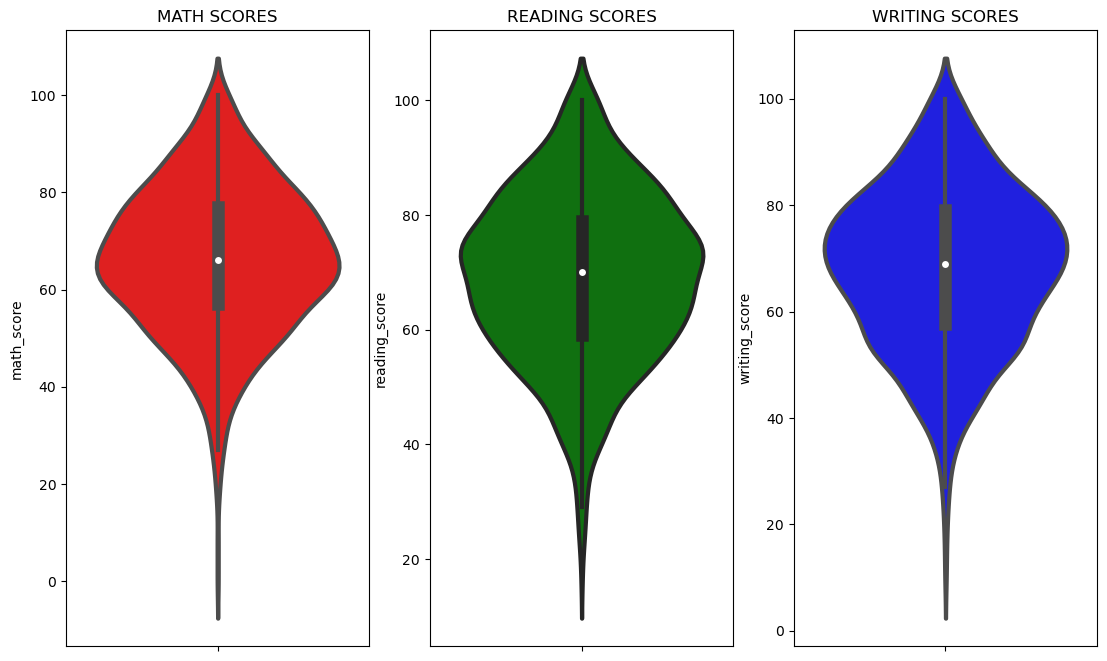

In [55]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

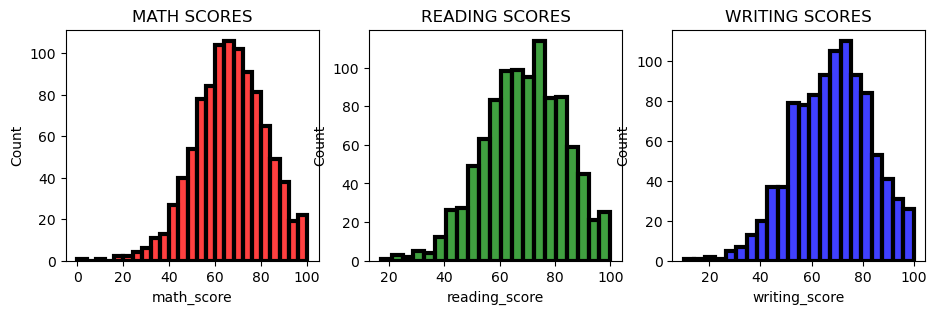

In [71]:
plt.figure(figsize=(15,3))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.histplot(x='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.histplot(x='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.histplot(x='writing_score',data=df,color='blue',linewidth=3)
plt.show()

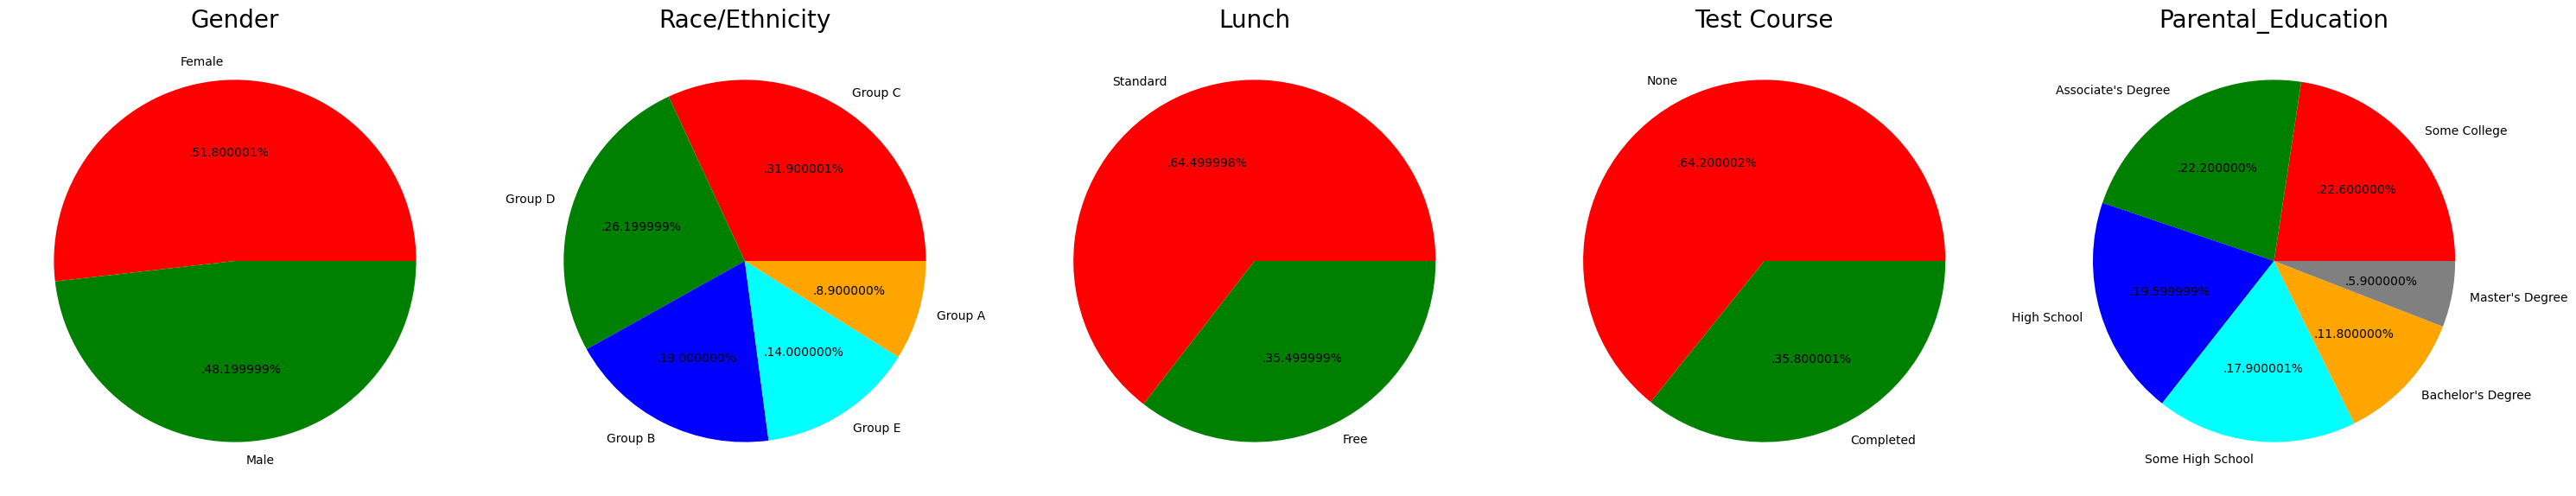

In [73]:

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

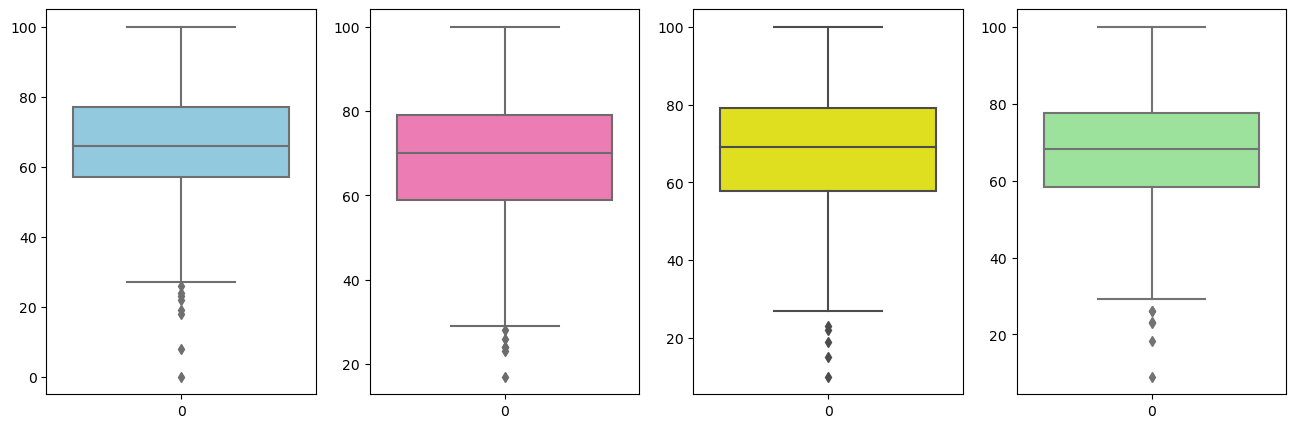

In [81]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()
